## Kmeans with Standard and Minmax Scaler

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm

In [2]:
# Import data
data= pd.read_csv('truncated_waittimes.csv', index_col='eruptionID')
data = data.dropna(how='any')
data.count()

geyser                 18627
eruption_time_epoch    18627
duration               18627
observer               18627
date                   18627
year                   18627
waiting_min            18627
waiting_hr             18627
dur                    18627
dtype: int64

In [4]:
data.dur.max()

344.0

In [5]:
data = data.loc[(data['waiting_min'] >= 25) & (data['waiting_min'] <= 110)]
data = data.loc[(data['dur'] >= 1) & (data['dur'] <= 9)]

In [8]:
# Drop irrelevant columns
data.drop(['geyser', 'eruption_time_epoch', 'observer', 'duration', 'date', 'waiting_hr'], inplace=True, axis=1, errors='ignore')
data.head()


,year,waiting_min,dur
eruptionID,,,
23132,1970,71.0,4.00
23133,1970,50.0,1.50
23134,1970,67.0,4.25
23135,1970,81.0,4.00
23136,1970,43.0,1.75


In [9]:
# set standard and mn-max scalers
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(data[['waiting_min', 'dur']])
df_std = std_scale.transform(data[['waiting_min', 'dur']])

minmax_scale = preprocessing.MinMaxScaler().fit(data[['waiting_min', 'dur']])
df_minmax = minmax_scale.transform(data[['waiting_min', 'dur']])

In [10]:
print('Mean after standardization: Waiting={:.2f}, Duration={:.2f}'
      .format(df_std[:,0].mean(), df_std[:,1].mean()))
print('\nStandard deviation after standardization: Waiting={:.2f}, Duration={:.2f}'
      .format(df_std[:,0].std(), df_std[:,1].std()))

Mean after standardization: Waiting=-0.00, Duration=-0.00

Standard deviation after standardization: Waiting=1.00, Duration=1.00


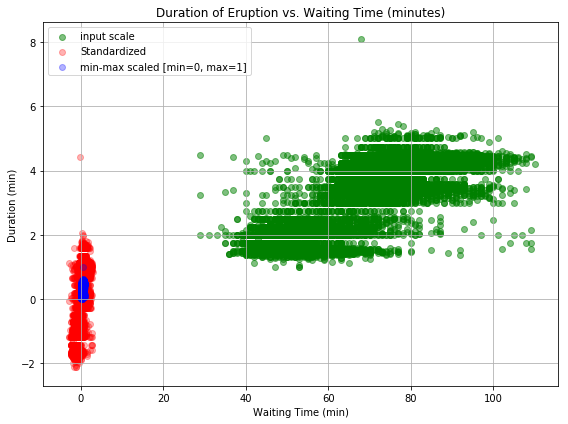

In [11]:
# Plot original, standard scaled, and minmax data
%matplotlib inline
plt.figure(figsize=(8,6))
plt.scatter(data['waiting_min'], data['dur'], color='green', label='input scale', alpha=0.5)
plt.scatter(df_std[:,0], df_std[:,1], color='red', label='Standardized', alpha=0.3)
plt.scatter(df_minmax[:,0], df_minmax[:,1], color='blue', label='min-max scaled [min=0, max=1]', alpha=0.3)
plt.title('Duration of Eruption vs. Waiting Time (minutes)')
plt.xlabel('Waiting Time (min)')
plt.ylabel('Duration (min)')
plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()

plt.show()

##### Standard Scaled Data

In [12]:
# Set number of clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)

In [13]:
# Fit standard scaled data first
kmeans.fit(df_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [14]:
kmeans.score(df_std)

-9153.654357870735

In [15]:
predicted_clusters = kmeans.predict(df_std)
predicted_clusters

array([0, 1, 0, ..., 0, 0, 0])

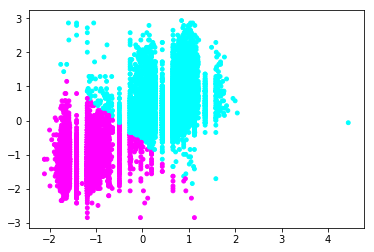

In [16]:
y=df_std[:, 0]
X=df_std[:, 1]

plt.scatter(X, y, c=predicted_clusters, s=15, cmap='cool')
plt.show()

#####  MinMax Scaled Data

In [17]:
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=2)

In [18]:
# Fit minmax scaled data
kmeans.fit(df_minmax)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [19]:
kmeans.score(df_minmax)

-253.07859308592177

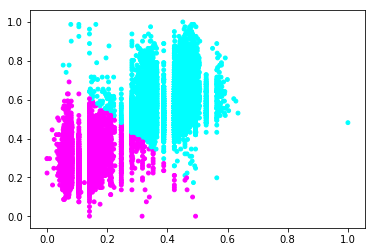

In [20]:
y=df_minmax[:, 0]
X=df_minmax[:, 1]

plt.scatter(X, y, c=predicted_clusters, s=15, cmap='cool')
plt.show()